In [16]:
%load_ext nb_black

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [17]:
import pandas as pd
import numpy as np
from fastai.tabular.core import *
from fastai.data.transforms import *
from fastcore.all import *
import seaborn as sns
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>

In [18]:
%matplotlib inline
import plotly as py
import plotly.tools as tls
import matplotlib.pyplot as plt

py.offline.init_notebook_mode(connected=True)
from plotly.offline import iplot

pd.options.plotting.backend = "plotly"

import seaborn as sns
import matplotlib.pyplot as plt

## initial viz settings ##
sns.set(font_scale=1.2)
col = "#3B1C8C"
cm = "viridis"

<IPython.core.display.Javascript object>

In [39]:
def day_chnager(x):
    if x == 0:
        return "Monday"
    elif x == 1:
        return "Tuesday"
    elif x == 2:
        return "Wednesday"
    elif x == 3:
        return "Thursday"
    elif x == 4:
        return "Friday"
    else:
        return None


def get_student_data(student_id, column_names, condtion="Present"):
    fix_column = "PRESENCE_STATUS_CD"
    column_to_fetch = [fix_column]
    column_to_fetch.extend(column_names)

    df_student = df.loc[student_id][column_to_fetch]
    if condtion == "Present":
        df_student = df_student[df_student["PRESENCE_STATUS_CD"] == "Present"]
    else:
        df_student = df_student[df_student["PRESENCE_STATUS_CD"] != "Present"]
    return df_student.copy()

<IPython.core.display.Javascript object>

In [28]:
path = Path(
    "/Users/gaurav.adlakha/Documents/attendance_s3_date/meetingattendance/attendance_meeting_append_data.csv"
)

<IPython.core.display.Javascript object>

In [29]:
%%time
df = pd.read_csv(path)

<timed exec>:1: DtypeWarning:

Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.



CPU times: user 50.5 s, sys: 20.4 s, total: 1min 10s
Wall time: 1min 17s


<IPython.core.display.Javascript object>

In [30]:
len(df)

23035206

<IPython.core.display.Javascript object>

In [31]:
df.columns

Index(['Unnamed: 0', 'SCHOOLYEAR', 'PRESENCE_STATUS_CD', 'GRADE_LEVEL',
       'COURSE_NAME', 'SCHOOLDCID', 'STUDENTID', 'LASTFIRST', 'SCHOOLID',
       'STUDENTDCID', 'SECTIONENROLLMENTDCID', 'CALENDARDCID', 'PERIODDCID',
       'PERIODNAME', 'ATTENDANCECODEDCID', 'SCHEDULINGTERMYEARDCID',
       'ATTENDANCEDATE', 'ATTENDANCEMODECODE', 'TOTALMINUTESATTENDED',
       'ATTENDANCECOMMENT', 'ATTENDANCE_CODE_DESCRIPTION', 'ADAVALUECODE',
       'ADAVALUETIME', 'ADMVALUE', 'ATTENDANCEFLAGS', 'SOURCESYSTEMID',
       'ATTENDANCEMODEFLAG'],
      dtype='object')

<IPython.core.display.Javascript object>

In [32]:
# df = pd.read_csv(path)
make_date(df, "ATTENDANCEDATE")
add_datepart(df, "ATTENDANCEDATE")

,Unnamed: 0,SCHOOLYEAR,PRESENCE_STATUS_CD,GRADE_LEVEL,COURSE_NAME,SCHOOLDCID,STUDENTID,LASTFIRST,SCHOOLID,STUDENTDCID,...,ATTENDANCEDATEDay,ATTENDANCEDATEDayofweek,ATTENDANCEDATEDayofyear,ATTENDANCEDATEIs_month_end,ATTENDANCEDATEIs_month_start,ATTENDANCEDATEIs_quarter_end,ATTENDANCEDATEIs_quarter_start,ATTENDANCEDATEIs_year_end,ATTENDANCEDATEIs_year_start,ATTENDANCEDATEElapsed
0,0,2017,Absent,11,CR American History II,4710,73254,"Haddock, Dominyk Haylei",260408,73254,...,14,0,134,False,False,False,False,False,False,1.526256e+09
1,1,2017,Absent,11,Library/Media Assist,4710,87498,"Burden Rozier, Tyanna Chrissy",260408,87498,...,17,3,137,False,False,False,False,False,False,1.526515e+09
2,2,2017,Absent,9,Principles of Business & Finance,4710,94998,"Royall, Kyson Catrina",260408,94998,...,22,1,142,False,False,False,False,False,False,1.526947e+09
3,3,2017,Absent,9,Visual Arts (Beginning),4710,141790,"Heyse, Gordon Kamaury",260408,660949,...,15,1,135,False,False,False,False,False,False,1.526342e+09
4,4,2017,Present,12,Visual Arts (Intermediate),4710,114606,"Okeke, Nakya Janya",260408,639214,...,15,1,135,False,False,False,False,False,False,1.526342e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23035201,78295,2020,Present,9,Microsoft Word and PowerPoint,4710,131119,"Couch, Dennys Keirsten",260408,651545,...,19,0,293,False,False,False,False,False,False,1.603066e+09
23035202,78296,2020,Present,9,Microsoft Word and PowerPoint,4710,241483,"Huston, Isreal Allie",260408,749972,...,19,0,293,False,False,False,False,False,False,1.603066e+09
23035203,78297,2020,Present,10,Microsoft Word and PowerPoint,4710,164733,"Weisner, Ellyana Yadrian",260408,680476,...,19,0,293,False,False,False,False,False,False,1.603066e+09
23035204,78298,2020,Present,10,Microsoft Word and PowerPoint,4710,79595,"Moellmer, Duron Sheyla",260408,79595,...,19,0,293,False,False,False,False,False,False,1.603066e+09


<IPython.core.display.Javascript object>

In [80]:
# df.sample(10)["ATTENDANCECOMMENT"]

<IPython.core.display.Javascript object>

In [34]:
df.set_index("STUDENTID", inplace=True)

<IPython.core.display.Javascript object>

# Week day Change

In [37]:
df["ATTENDANCEDATEDayofweek"] = df["ATTENDANCEDATEDayofweek"].map(day_chnager)

<IPython.core.display.Javascript object>

In [40]:
df_student = get_student_data(89271.0, ["ATTENDANCEDATEDayofweek"])
df_student.groupby("ATTENDANCEDATEDayofweek").count().plot(kind="bar")

<IPython.core.display.Javascript object>

In [49]:
df["GRADE_LEVEL"].value_counts()

 9     3837433
 10    3553531
 11    3239127
 12    2895946
 7     1259945
 8     1228160
 6     1186381
 1     1014342
 0      999966
 2      922363
 4      882923
 3      867525
 5      863420
-1      190729
 99      33183
-2       28080
-9       24895
-3        6268
-4         424
 13        415
-5         150
Name: GRADE_LEVEL, dtype: int64

<IPython.core.display.Javascript object>

In [51]:
df_grade = df[df["GRADE_LEVEL"].isin([11, 12])]

<IPython.core.display.Javascript object>

In [53]:
(df_grade)

6135073

<IPython.core.display.Javascript object>

In [55]:
df_grade["GRADE_LEVEL"].value_counts().plot(kind="bar")

<IPython.core.display.Javascript object>

In [63]:
len(df_grade.COURSE_NAME.value_counts())

981

<IPython.core.display.Javascript object>

In [64]:
df_grade.COURSE_NAME.value_counts()[0:10]

English IV                                  301213
English III                                 258193
American History II                         257232
NC Math 3                                   222754
Amer History: Founding Prin, Civics&Econ    191380
Spanish II                                  176784
Physical Science                            155492
Biology                                     149494
Physical Education: Grades 9-12             139811
NC Math 4                                   125169
Name: COURSE_NAME, dtype: int64

<IPython.core.display.Javascript object>

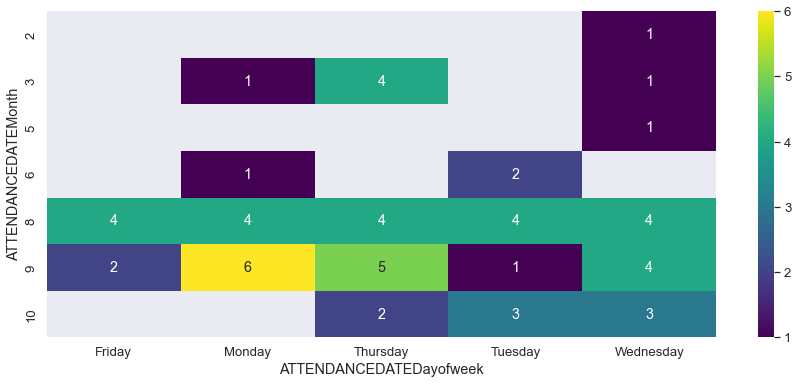

<IPython.core.display.Javascript object>

In [72]:
df_grade_presnt = df_grade.loc[63992][
    df_grade.loc[63992]["PRESENCE_STATUS_CD"] == "Present"
]
df_student = df_grade_presnt

plt.figure(figsize=(15, 6))
sns.heatmap(
    (
        df_student.groupby(["ATTENDANCEDATEMonth", "ATTENDANCEDATEDayofweek"])[
            "PRESENCE_STATUS_CD"
        ].count()
    ).unstack(),
    annot=True,
    fmt="g",
    cmap=cm,
)
plt.show()

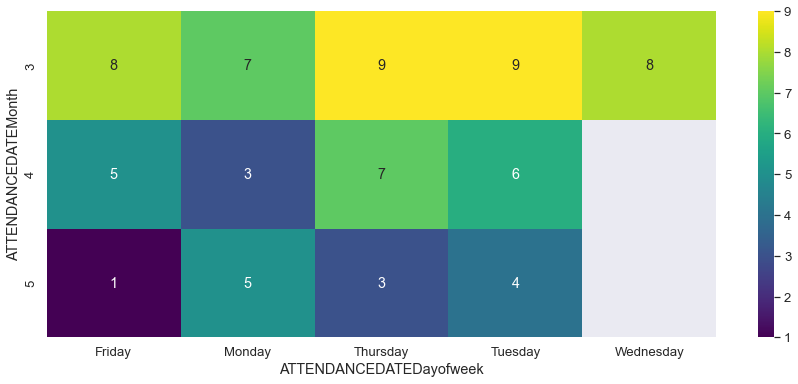

<IPython.core.display.Javascript object>

In [73]:
df_grade_presnt = df_grade.loc[63992][
    df_grade.loc[63992]["PRESENCE_STATUS_CD"] != "Present"
]
df_student = df_grade_presnt

plt.figure(figsize=(15, 6))
sns.heatmap(
    (
        df_student.groupby(["ATTENDANCEDATEMonth", "ATTENDANCEDATEDayofweek"])[
            "PRESENCE_STATUS_CD"
        ].count()
    ).unstack(),
    annot=True,
    fmt="g",
    cmap=cm,
)
plt.show()

In [94]:
df_grade_presnt = df_grade.loc[63992][
    df_grade.loc[63992]["PRESENCE_STATUS_CD"] == "Present"
]

df_grade_presnt.groupby("COURSE_NAME").count()["PRESENCE_STATUS_CD"].plot(kind="bar")

<IPython.core.display.Javascript object>

In [95]:
df_grade_absent = df_grade.loc[63992][
    df_grade.loc[63992]["PRESENCE_STATUS_CD"] != "Present"
]
df_grade_absent.groupby("COURSE_NAME").count()["PRESENCE_STATUS_CD"].plot(kind="bar")

<IPython.core.display.Javascript object>

In [146]:
df_grade_absent = df_grade.loc[102453][
    df_grade.loc[102453]["PRESENCE_STATUS_CD"] != "Present"
]
df_grade_absent.groupby("COURSE_NAME").count()["PRESENCE_STATUS_CD"].plot(kind="bar")

<IPython.core.display.Javascript object>

In [147]:
df_grade_absent = df_grade.loc[99971][
    df_grade.loc[99971]["PRESENCE_STATUS_CD"] != "Present"
]
df_grade_absent.groupby("COURSE_NAME").count()["PRESENCE_STATUS_CD"].plot(kind="bar")

<IPython.core.display.Javascript object>

In [96]:
df_grade_absent = df_grade.loc[63992][
    df_grade.loc[63992]["PRESENCE_STATUS_CD"] != "Present"
]
df_grade_absent.groupby("COURSE_NAME").count()["PRESENCE_STATUS_CD"].plot(kind="bar")

,Unnamed: 0,SCHOOLYEAR,PRESENCE_STATUS_CD,GRADE_LEVEL,COURSE_NAME,SCHOOLDCID,LASTFIRST,SCHOOLID,STUDENTDCID,SECTIONENROLLMENTDCID,...,ATTENDANCEDATEDay,ATTENDANCEDATEDayofweek,ATTENDANCEDATEDayofyear,ATTENDANCEDATEIs_month_end,ATTENDANCEDATEIs_month_start,ATTENDANCEDATEIs_quarter_end,ATTENDANCEDATEIs_quarter_start,ATTENDANCEDATEIs_year_end,ATTENDANCEDATEIs_year_start,ATTENDANCEDATEElapsed
STUDENTID,,,,,,,,,,,,,,,,,,,,,
73254,0,2017,Absent,11,CR American History II,4710,"Haddock, Dominyk Haylei",260408,73254,84865398,...,14,Monday,134,False,False,False,False,False,False,1.526256e+09
87498,1,2017,Absent,11,Library/Media Assist,4710,"Burden Rozier, Tyanna Chrissy",260408,87498,84833193,...,17,Thursday,137,False,False,False,False,False,False,1.526515e+09
114606,4,2017,Present,12,Visual Arts (Intermediate),4710,"Okeke, Nakya Janya",260408,639214,84838550,...,15,Tuesday,135,False,False,False,False,False,False,1.526342e+09
72201,9,2017,Present,12,Interior Design I,4710,"Holcombe, Alexei Zi'Onna",260408,72201,81835621,...,15,Tuesday,135,False,False,False,False,False,False,1.526342e+09
72750,11,2017,Present,12,Business Law,4710,"Burks, Joey Kristiana",260408,72750,84830251,...,9,Wednesday,129,False,False,False,False,False,False,1.525824e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98438,78286,2020,Present,11,Physical Education II Grades 9-12,4710,"Matthews, Bentley Eugene",260408,98438,87297984,...,19,Monday,293,False,False,False,False,False,False,1.603066e+09
58197,78287,2020,Present,11,Physical Education II Grades 9-12,4710,"Dara, Alonso Jeannie",260408,58197,87126654,...,19,Monday,293,False,False,False,False,False,False,1.603066e+09
89398,78288,2020,Present,11,Physical Education II Grades 9-12,4710,"Reifke, Nicholai",260408,89398,86853119,...,19,Monday,293,False,False,False,False,False,False,1.603066e+09


<IPython.core.display.Javascript object>

In [97]:
len(df_grade)

6135073

<IPython.core.display.Javascript object>

In [142]:
df_grade_absent = df_grade[df_grade["PRESENCE_STATUS_CD"] != "Present"]
df_grade_absent.groupby("COURSE_NAME").count()["PRESENCE_STATUS_CD"].plot(kind="bar")

<IPython.core.display.Javascript object>

In [103]:
df_grade_absent.groupby("COURSE_NAME").count()["PRESENCE_STATUS_CD"][0:10].plot(
    kind="bar"
)

<IPython.core.display.Javascript object>

In [138]:
df_grade_absent.groupby("COURSE_NAME").count()["PRESENCE_STATUS_CD"].sort_values()[
    ::-1
][0:10].plot(kind="barh")

<IPython.core.display.Javascript object>

In [132]:
df_grade_Present = df_grade[df_grade["PRESENCE_STATUS_CD"] == "Present"]

<IPython.core.display.Javascript object>

In [139]:
df_grade_Present.groupby("COURSE_NAME").count()["PRESENCE_STATUS_CD"].sort_values()[
    ::-1
][0:10].plot(kind="barh")

<IPython.core.display.Javascript object>

In [141]:
df_grade_Present.groupby("COURSE_NAME").count()["PRESENCE_STATUS_CD"].sort_values()[
    ::-1
].plot()

<IPython.core.display.Javascript object>

In [144]:
df_grade_absent.groupby("COURSE_NAME").count()["PRESENCE_STATUS_CD"].sort_values()[
    ::-1
].plot()

<IPython.core.display.Javascript object>

In [153]:
df_73254 = df_grade.loc[73254][df_grade.loc[73254]["PRESENCE_STATUS_CD"] == "Absent"]

<IPython.core.display.Javascript object>

In [169]:
df_73254.groupby(["COURSE_NAME", "ATTENDANCEDATEDayofweek"]).count()[
    "PRESENCE_STATUS_CD"
].unstack()


# # df_student = df_grade_presnt

# plt.figure(figsize=(15, 6))
# sns.heatmap(
#     (
#         df_student.groupby(["ATTENDANCEDATEMonth", "ATTENDANCEDATEDayofweek"])[
#             "PRESENCE_STATUS_CD"
#         ].count()
#     ).unstack(),
#     annot=True,
#     fmt="g",
#     cmap=cm,
# )
# plt.show()

ATTENDANCEDATEDayofweek,Friday,Monday,Thursday,Tuesday,Wednesday
COURSE_NAME,,,,,
Actvty Period/Homeroom,8.0,6.0,9.0,8.0,10.0
American History II,1.0,2.0,1.0,2.0,2.0
CR American History II,6.0,6.0,6.0,6.0,6.0
CR Physical Science,7.0,4.0,7.0,6.0,8.0
Latin I,1.0,2.0,1.0,2.0,2.0
Physical Fitness II Grades 9-12,2.0,2.0,1.0,2.0,2.0
Physical Science,1.0,2.0,1.0,2.0,2.0
Visual Arts (Beginning),NaN,NaN,1.0,NaN,NaN


<IPython.core.display.Javascript object>

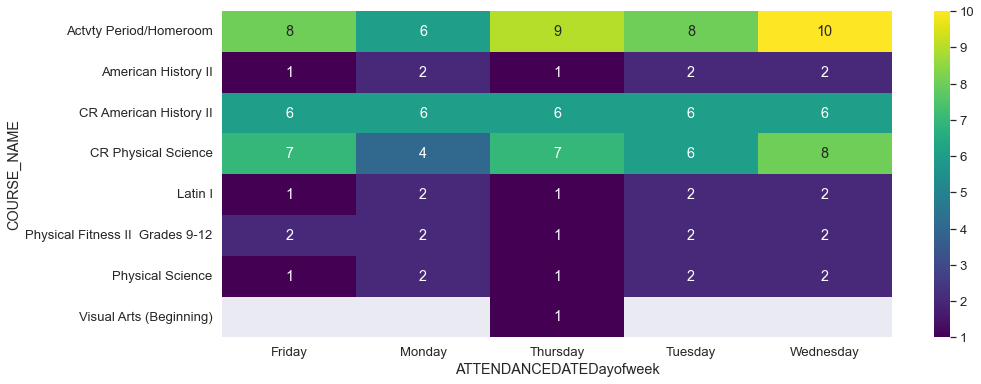

<IPython.core.display.Javascript object>

In [176]:
df_73254 = df_grade.loc[73254][df_grade.loc[73254]["PRESENCE_STATUS_CD"] == "Absent"]

plt.figure(figsize=(15, 6))
sns.heatmap(
    df_73254.groupby(["COURSE_NAME", "ATTENDANCEDATEDayofweek"])
    .count()["PRESENCE_STATUS_CD"]
    .unstack(),
     annot=True,
      fmt="g",
      cmap=cm,
      )
plt.show()


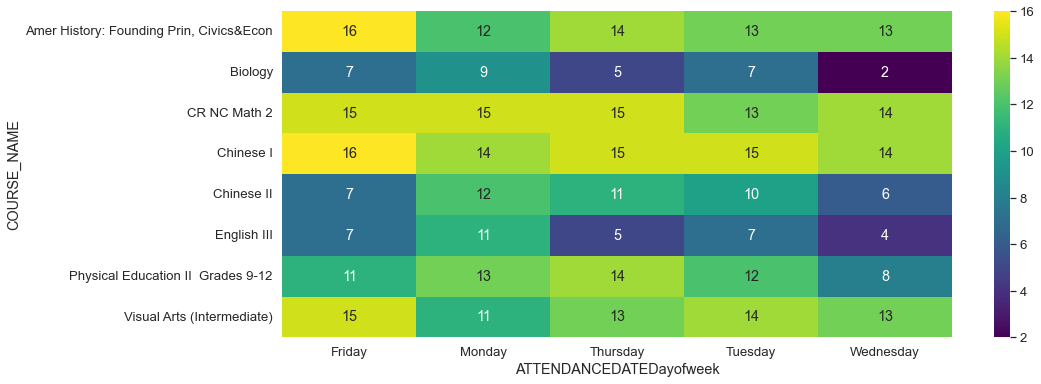

<IPython.core.display.Javascript object>

In [179]:
df_195558 = df_grade.loc[195558][df_grade.loc[195558]["PRESENCE_STATUS_CD"] == "Absent"]

plt.figure(figsize=(15, 6))
sns.heatmap(
    df_195558.groupby(["COURSE_NAME", "ATTENDANCEDATEDayofweek"])
    .count()["PRESENCE_STATUS_CD"]
    .unstack(),
    annot=True,
    fmt="g",
    cmap=cm,
)
plt.show()

In [207]:
df_grade["PERIODNAME"].value_counts()

1              1172075
2              1042046
3              1008048
4               918264
1               450644
2               368496
3               348891
4               328052
Period 1        105770
Period 2        102609
Period 4         80214
Period 3         79130
99               66359
99               31644
5                11825
Advisory          9536
Period 0          4407
5                 2852
88                 790
6                  757
Homeroom/RT        628
99 Homeroom        566
6                  527
Period 6           315
Homeroom           282
Period 5           213
7                   96
7                   11
41                   8
8                    4
42                   4
41                   4
8                    3
42                   3
Name: PERIODNAME, dtype: int64

<IPython.core.display.Javascript object>

In [195]:
df_grade.sample(2).transpose()

STUDENTID,72867,85711
Unnamed: 0,7750,10818
SCHOOLYEAR,2017,2020
PRESENCE_STATUS_CD,Absent,Present
GRADE_LEVEL,12,11
COURSE_NAME,Adobe Visual Design,English III Honors
SCHOOLDCID,4722,5
LASTFIRST,"Snoyman, Calab Sacoya","Alfadhl, Kielan Sheyenne"
SCHOOLID,260427,260318
STUDENTDCID,72867,85711
SECTIONENROLLMENTDCID,84689957,86875346


<IPython.core.display.Javascript object>

In [212]:
df_grade_Present.groupby(["PERIODNAME", "COURSE_NAME"]).count()[
    "PRESENCE_STATUS_CD"
].unstack()

COURSE_NAME,21st Century Media Studies Honors,ACA 122 College Transfer Success,ACA122 College Transfer Success,ACC120 Principles of Financial Accountin,ACC121 Prin of Managerial Accounting,ACT Prep,ACT Preparation,AHR112 Heating Technology,AHR113 Comfort Cooling,AHR114 Heat Pump Technology,...,WLD141 Symbols and Specifications,Weightlifting,Woodworking I,Woodworking II,Woodworking III,Workforce Ready,World Geography,World History,World History Honors,Zoology Honors
PERIODNAME,,,,,,,,,,,,,,,,,,,,,
1,NaN,1.0,87.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1689.0,NaN,NaN,528.0,138.0,1299.0,135.0,86.0
2,NaN,1.0,29.0,NaN,NaN,2032.0,NaN,NaN,NaN,NaN,...,NaN,772.0,NaN,NaN,NaN,NaN,NaN,1022.0,287.0,46.0
3,NaN,7.0,1129.0,164.0,51.0,757.0,NaN,1.0,42.0,77.0,...,NaN,NaN,NaN,439.0,37.0,NaN,1.0,1120.0,328.0,NaN
4,1.0,NaN,1309.0,82.0,NaN,NaN,NaN,NaN,42.0,78.0,...,13.0,2628.0,948.0,286.0,6.0,196.0,4.0,300.0,271.0,NaN
5,NaN,5.0,121.0,79.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<IPython.core.display.Javascript object>

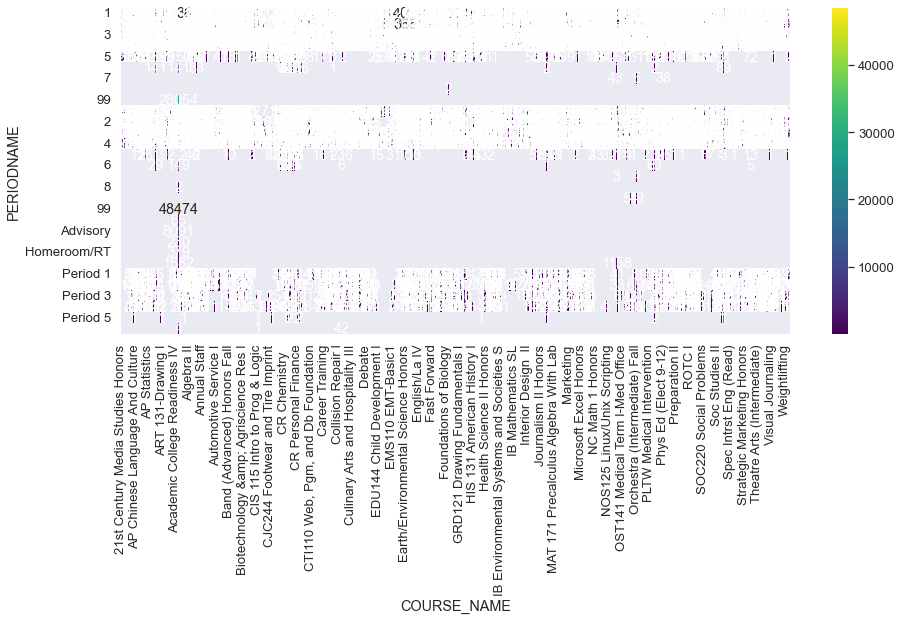

<IPython.core.display.Javascript object>

In [214]:
# df_195558 = df_grade.loc[195558][df_grade.loc[195558]["PRESENCE_STATUS_CD"] == "Absent"]

plt.figure(figsize=(15, 6))
sns.heatmap(
    df_grade_Present.groupby(["PERIODNAME", "COURSE_NAME"])
    .count()["PRESENCE_STATUS_CD"]
    .unstack(),
    annot=True,
    fmt="g",
    cmap=cm,
)
plt.show()

In [245]:
df_grade_absent = df_grade[df_grade["PRESENCE_STATUS_CD"] == "Absent"]
df_grade_presnt = df_grade[df_grade["PRESENCE_STATUS_CD"] == "Present"]

<IPython.core.display.Javascript object>

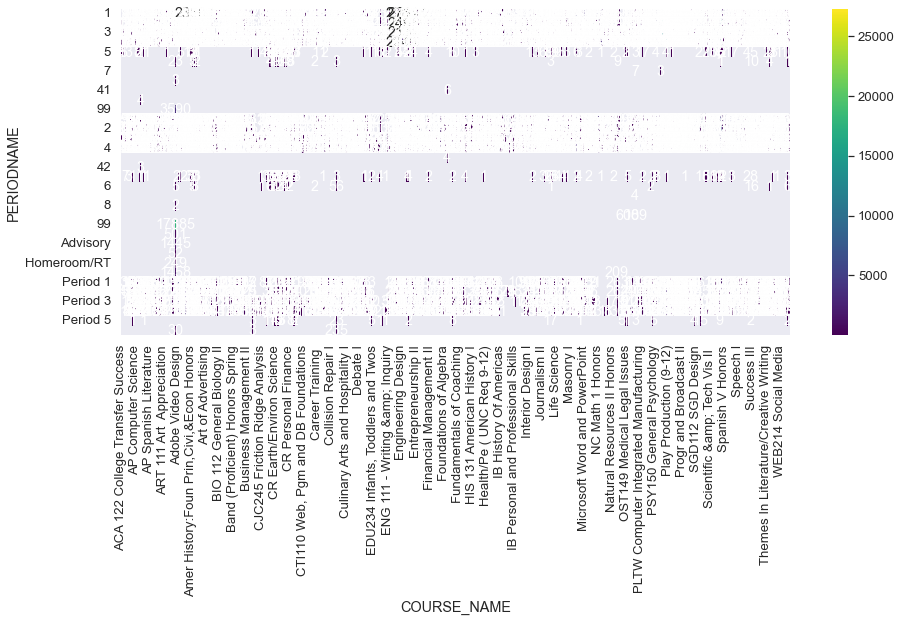

<IPython.core.display.Javascript object>

In [232]:
plt.figure(figsize=(15, 6))
sns.heatmap(
    df_grade_absent.groupby(["PERIODNAME", "COURSE_NAME"])
    .count()["PRESENCE_STATUS_CD"]
    .unstack(),
    annot=True,
    fmt="g",
    cmap=cm,
)
plt.show()

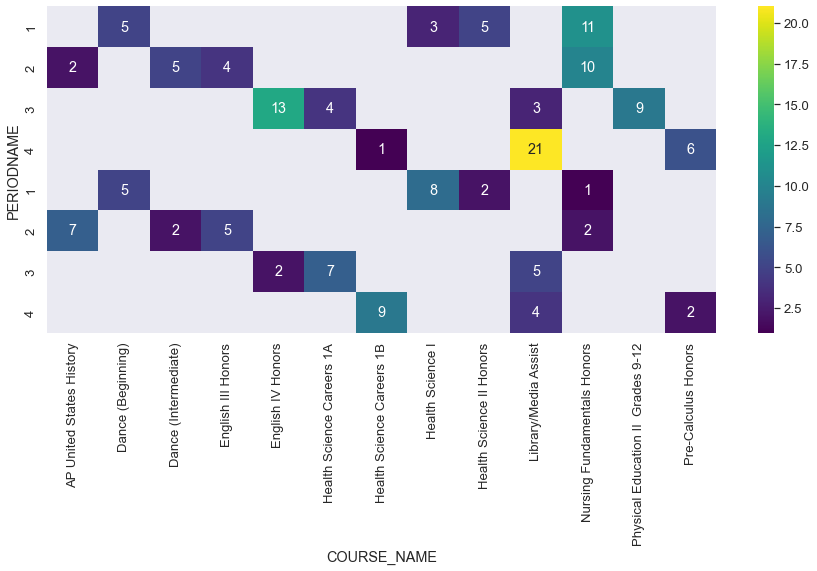

<IPython.core.display.Javascript object>

In [236]:
df_student = df_grade_absent.loc[87498]

plt.figure(figsize=(15, 6))
sns.heatmap(
    df_student.groupby(["PERIODNAME", "COURSE_NAME"])
    .count()["PRESENCE_STATUS_CD"]
    .unstack(),
    annot=True,
    fmt="g",
    cmap=cm,
)
plt.show()

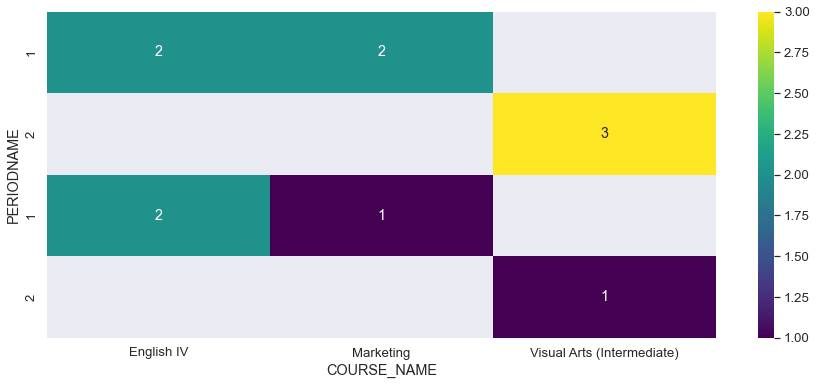

<IPython.core.display.Javascript object>

In [248]:
df_student = df_grade_presnt.loc[114606]

plt.figure(figsize=(15, 6))
sns.heatmap(
    df_student.groupby(["PERIODNAME", "COURSE_NAME"])
    .count()["PRESENCE_STATUS_CD"]
    .unstack(),
    annot=True,
    fmt="g",
    cmap=cm,
)
plt.show()

In [257]:
df_grade.groupby("PERIODNAME").count()["PRESENCE_STATUS_CD"]

PERIODNAME
1              1172075
2              1042046
3              1008048
4               918264
5                11825
6                  757
7                   96
8                    3
41                   8
42                   4
99               31644
1               450644
2               368496
3               348891
4               328052
41                   4
42                   3
5                 2852
6                  527
7                   11
8                    4
88                 790
99               66359
99 Homeroom        566
Advisory          9536
Homeroom           282
Homeroom/RT        628
Period 0          4407
Period 1        105770
Period 2        102609
Period 3         79130
Period 4         80214
Period 5           213
Period 6           315
Name: PRESENCE_STATUS_CD, dtype: int64

<IPython.core.display.Javascript object>